<a href="https://colab.research.google.com/github/NJena404/Time-series-analysis-Bitcoin-price-prediction-/blob/main/Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pystan
!pip3 install fbprophet
from fbprophet import Prophet #for time series prediction

In [32]:
df=pd.read_csv('/content/BTC-USD.csv')

In [34]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
944,2019-10-22,8243.402344,8296.651367,8074.462891,8078.203125,8078.203125,16803377857
527,2018-08-31,6973.970215,7057.169922,6920.160156,7037.580078,7037.580078,4495650000
1175,2020-06-09,9774.360352,9836.369141,9664.719727,9795.700195,9795.700195,23717842783
1310,2020-10-22,12801.635742,13161.593750,12717.093750,12965.891602,12965.891602,34729759598
745,2019-04-06,5036.792969,5205.821777,4992.222168,5059.817383,5059.817383,16929795194


In [35]:
df.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)
df.rename(columns={'Close':'Price'},inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1827 non-null   object 
 1   Price   1827 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


In [37]:
df['Date']=pd.to_datetime(df['Date'])

In [38]:
df.head()

,Date,Price
0,2017-03-22,1049.140015
1,2017-03-23,1038.589966
2,2017-03-24,937.520020
3,2017-03-25,972.778992
4,2017-03-26,966.724976


EDA AND FEATURE ENGINEERING

Text(0, 0.5, 'Price')

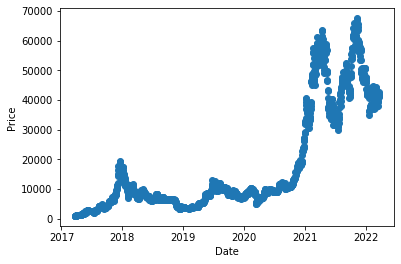

In [40]:
plt.scatter(df['Date'],df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')

In [43]:
#prediction model building

m=Prophet()
df.columns=['ds','y']

In [44]:
model=m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future=m.make_future_dataframe(periods=365,freq='D')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2187,2023-03-18,38717.429117,19656.973272,59921.473007,21136.206311,58636.523759,-233.927739,-233.927739,-233.927739,15.384062,15.384062,15.384062,-249.311801,-249.311801,-249.311801,0.0,0.0,0.0,38483.501378
2188,2023-03-19,38702.255829,18621.377933,58990.392673,21038.110093,58756.465552,-179.697014,-179.697014,-179.697014,-18.493248,-18.493248,-18.493248,-161.203766,-161.203766,-161.203766,0.0,0.0,0.0,38522.558815
2189,2023-03-20,38687.082541,20032.882511,60444.631707,20940.013874,58877.108659,-51.961887,-51.961887,-51.961887,13.111661,13.111661,13.111661,-65.073548,-65.073548,-65.073548,0.0,0.0,0.0,38635.120654
2190,2023-03-21,38671.909254,19054.461368,60724.650748,20813.540505,58967.727140,22.680496,22.680496,22.680496,-14.118183,-14.118183,-14.118183,36.798679,36.798679,36.798679,0.0,0.0,0.0,38694.589749
2191,2023-03-22,38656.735966,19384.808588,60699.382595,20672.803684,59037.082651,189.935296,189.935296,189.935296,47.852740,47.852740,47.852740,142.082555,142.082555,142.082555,0.0,0.0,0.0,38846.671261


In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-03-22,163.751979,-5194.440583,5601.353465,163.751979,163.751979,243.129587,243.129587,243.129587,47.852740,47.852740,47.852740,195.276847,195.276847,195.276847,0.0,0.0,0.0,406.881566
1,2017-03-23,198.100430,-5432.431871,6460.442056,198.100430,198.100430,266.693038,266.693038,266.693038,-34.654710,-34.654710,-34.654710,301.347747,301.347747,301.347747,0.0,0.0,0.0,464.793468
2,2017-03-24,232.448882,-4783.111295,6368.357064,232.448882,232.448882,396.095590,396.095590,396.095590,-9.082323,-9.082323,-9.082323,405.177913,405.177913,405.177913,0.0,0.0,0.0,628.544472
3,2017-03-25,266.797333,-4709.355863,5827.259917,266.797333,266.797333,520.107628,520.107628,520.107628,15.384062,15.384062,15.384062,504.723566,504.723566,504.723566,0.0,0.0,0.0,786.904961
4,2017-03-26,301.145785,-4796.732206,6033.261538,301.145785,301.145785,579.647101,579.647101,579.647101,-18.493248,-18.493248,-18.493248,598.140348,598.140348,598.140348,0.0,0.0,0.0,880.792886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2023-03-18,38717.429117,19656.973272,59921.473007,21136.206311,58636.523759,-233.927739,-233.927739,-233.927739,15.384062,15.384062,15.384062,-249.311801,-249.311801,-249.311801,0.0,0.0,0.0,38483.501378
2188,2023-03-19,38702.255829,18621.377933,58990.392673,21038.110093,58756.465552,-179.697014,-179.697014,-179.697014,-18.493248,-18.493248,-18.493248,-161.203766,-161.203766,-161.203766,0.0,0.0,0.0,38522.558815
2189,2023-03-20,38687.082541,20032.882511,60444.631707,20940.013874,58877.108659,-51.961887,-51.961887,-51.961887,13.111661,13.111661,13.111661,-65.073548,-65.073548,-65.073548,0.0,0.0,0.0,38635.120654
2190,2023-03-21,38671.909254,19054.461368,60724.650748,20813.540505,58967.727140,22.680496,22.680496,22.680496,-14.118183,-14.118183,-14.118183,36.798679,36.798679,36.798679,0.0,0.0,0.0,38694.589749


# *On 2023-03-22 the price of the bitcoin would be 38846.671261* (The yhat value from the above table is the predicted value)

In [54]:
#Visual presentation
from fbprophet.plot import plot_plotly,plot_components_plotly
plot_plotly(m,forecast)